In [1]:
import pandas as pd
import numpy as np
import cv2
from psd_tools import PSDImage
import matplotlib.pyplot as plt
from retinaface import RetinaFace


In [ ]:
psd=PSDImage.open("test.psd")
psd

In [3]:
for layer in psd:
    print(layer.name)

Background
Sheet1_Object2_1_bg_c_h
Sheet1_Object2_2_bg_r_h
Sheet1_Object2_3_v
Sheet1_Object2_4_v
Sheet1_Object2_5_h


In [4]:
len(psd)

6

In [5]:
type(psd)

psd_tools.api.psd_image.PSDImage

In [ ]:
for layer in psd:
    print(type(layer))

In [ ]:
for layer in psd:
    print(type(layer.name))

In [8]:
img=psd.topil()

In [ ]:
img

In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=10800x3600 at 0x1B87BAA0D00>


In [11]:
type(img)

PIL.Image.Image

In [ ]:
plt.imshow(img)

In [ ]:
i=0
for layer in psd:
    if i==4:
        sd=layer.topil()
        plt.imshow(sd)
    i+=1

In [14]:
for layer in psd:
    x=layer.topil()
    x.save(f"{layer.name}.png")

In [15]:
faces=RetinaFace.detect_faces(f"{psd[4].name}.png")

In [ ]:
faces

In [ ]:
for face in faces:
    print(faces[face])

In [19]:
x1,y1,x2,y2=faces["face_1"]["facial_area"]

In [ ]:
print(x1,y1,x2,y2)

In [82]:
x=cv2.imread(f"{psd[4].name}.png")

In [68]:
type(x)

numpy.ndarray

In [76]:
x.shape

(2950, 1967, 3)

In [73]:
x=x[:,:,::-1] #reversing bgr to rgb

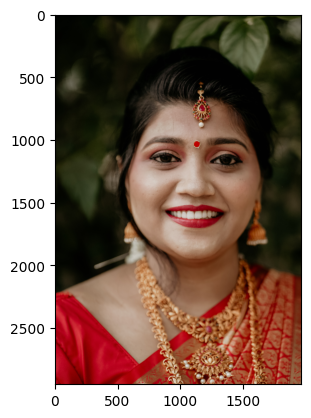

In [74]:
plt.imshow(x)

In [106]:
cv2.rectangle(x,(x1,y1),(x2,y2),color=(255,0,0),thickness=5)

array([[[  1,   3,   3],
        [  1,   3,   3],
        [  1,   3,   3],
        ...,
        [ 16,  58,  47],
        [ 14,  57,  46],
        [ 16,  59,  48]],

       [[  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [ 18,  60,  49],
        [ 16,  58,  47],
        [ 13,  55,  44]],

       [[  1,   3,   3],
        [  0,   2,   2],
        [  0,   1,   1],
        ...,
        [ 14,  56,  45],
        [ 14,  56,  45],
        [ 11,  53,  42]],

       ...,

       [[ 32,   2, 179],
        [ 34,   4, 182],
        [ 29,   3, 177],
        ...,
        [ 65,  96, 140],
        [ 72, 103, 148],
        [ 70, 101, 146]],

       [[ 28,   1, 174],
        [ 35,  10, 182],
        [ 36,   7, 183],
        ...,
        [ 70, 101, 146],
        [ 70, 101, 147],
        [ 71, 102, 147]],

       [[ 32,   5, 179],
        [ 35,  11, 183],
        [ 37,  10, 184],
        ...,
        [ 73, 104, 149],
        [ 70, 100, 146],
        [ 69, 100, 145]]

In [ ]:
plt.imshow(x[:,:,::-1])

In [108]:
x.shape

(2950, 1967, 3)

In [109]:
length=x.shape[1]
width=x.shape[0]

In [118]:
def information(face,name,l,b):
    x1,y1,x2,y2 = face['facial_area']
    pos = ''
    cof = x1 + (x2-x1)//2
    if cof<l//3:
        pos+='L'
    elif l//3<cof<2*(l//3):
        pos+='C'
    else:
        pos+="R"
    t = ''
    if l>b:
        t+='H'
    else:
        t+='V'
    data.append([name,t,pos,y1,x1,l-x2])
    return data

In [119]:
data=[]
for layer in psd:
    img = layer.topil()
    img.save(layer.name+'.png')
    nimg = cv2.imread(layer.name+'.png')
    faces = RetinaFace.detect_faces(nimg)
    if len(faces) ==2:
        continue
    information(faces['face_1'],layer.name,nimg.shape[1],nimg.shape[0])
    
   
    

In [120]:
data

[['Sheet1_Object2_1_bg_c_h', 'H', 'C', 1311, 2698, 2321],
 ['Sheet1_Object2_2_bg_r_h', 'H', 'R', 1775, 5238, 1552],
 ['Sheet1_Object2_3_v', 'V', 'C', 869, 1081, 812],
 ['Sheet1_Object2_4_v', 'V', 'C', 584, 610, 341],
 ['Sheet1_Object2_5_h', 'H', 'C', 182, 1041, 647]]

In [121]:
df = pd.DataFrame(data, columns=['Name', 'Type','Positon','Headroom','Leftroom','Rightroom'])

In [122]:
df

,Name,Type,Positon,Headroom,Leftroom,Rightroom
0,Sheet1_Object2_1_bg_c_h,H,C,1311,2698,2321
1,Sheet1_Object2_2_bg_r_h,H,R,1775,5238,1552
2,Sheet1_Object2_3_v,V,C,869,1081,812
3,Sheet1_Object2_4_v,V,C,584,610,341
4,Sheet1_Object2_5_h,H,C,182,1041,647


In [123]:
df.to_csv('data.csv',index=False)